# Lorenz system

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import control
import re, seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
np.random.seed(10)
N = 1000
X = np.random.uniform(-1, 1, (N, 3))
y1 = np.zeros(N)
y2 = -X[:, 0] * X[:, 2]
y3 = X[:, 0] * X[:, 1]
def rbf (x_i, x_j, gamma = 1.0):
    return np.exp( -gamma * (np.linalg.norm((x_i - x_j),2)))
def make_SVR(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=100)
    feature_scaler = StandardScaler()
    X_train = feature_scaler.fit_transform(X_train)
    X_test = feature_scaler.transform(X_test)
    parameters = {"C": [1],
                  "gamma": [0.001],
                  "epsilon": [0.1]
                 }
    model = GridSearchCV(SVR(kernel='rbf'), parameters)
    model.fit(X_train, y_train)
    return  model

In [2]:
def f_nl(x):
    return np.array([0, -x[0] * x[2], x[0] * x[1]])

In [3]:
MLor = np.array([[-10,10,0],[28,-1,0],[0,0,-8/3]])
B = np.array([[1],[1],[1]])
P = np.array([-1, -2, -3])
u_control_lorenz = control.acker(MLor, B, P)
model1 = make_SVR(X, y1)
model2 = make_SVR(X, y2)
model3 = make_SVR(X, y3)
print('Feedback gain matrix k = {0}'.format(u_control_lorenz))

Feedback gain matrix k = [[-2.08669202e+01  1.32015209e+01 -1.26742712e-03]]


In [4]:
def approximated_lorenz(q, M, B, u_control):
    f_nl_error = f_nl(q) - np.array([model1.predict([q])[0], model2.predict([q])[0], model3.predict([q])[0]])
    M_stab = M.dot(q) - B.dot(u_control).dot(q) 
    xst = M_stab + f_nl_error
    return np.array(xst)

In [5]:
t = np.linspace(0, 20, int(10000), endpoint=True)
ns = len(t)
xs = np.empty(ns)
ys = np.empty(ns)
zs = np.empty(ns)
xs[0], ys[0], zs[0] = (-2, -8, -13)
for i in tqdm(range(ns - 1)):
    current_point = np.array([xs[i], ys[i], zs[i]])
    dt = t[i+1] - t[i]
    xt, yt, zt = approximated_lorenz(current_point, MLor, B, u_control_lorenz)
    xs[i + 1] = xs[i] + (xt * dt)
    ys[i + 1] = ys[i] + (yt * dt)
    zs[i + 1] = zs[i] + (zt * dt)
print(xs[ns-1], ys[ns-1], zs[ns-1])

100%|█████████████████████████████████████| 9999/9999 [00:03<00:00, 2901.45it/s]

-0.0017305342410755945 -0.0058671457707546735 0.01720281154192208


Text(0, 0.5, 'z')

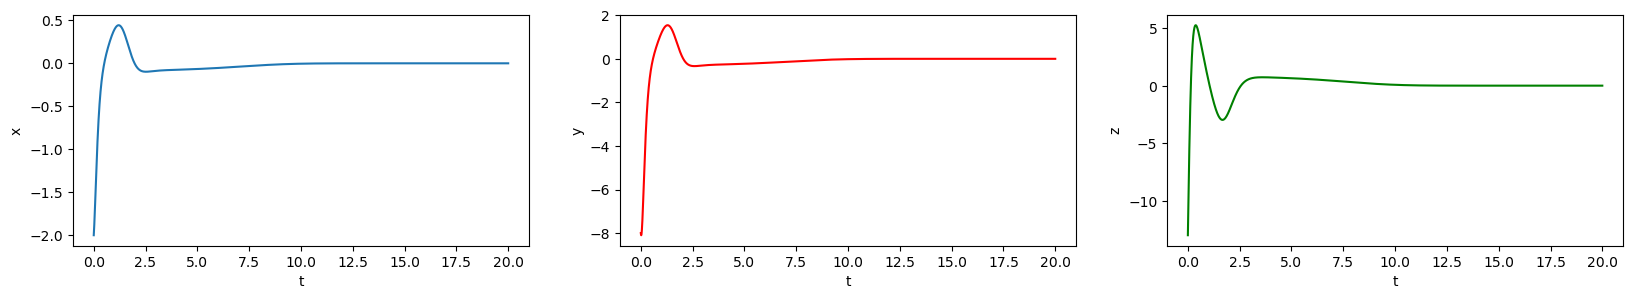

In [6]:
plt.figure(figsize=(20, 3))

plt.subplot(131)
plt.plot(t, xs)
plt.xlabel("t")
plt.ylabel("x");

plt.subplot(132)
plt.plot(t, ys, color = 'r')
plt.xlabel("t")
plt.ylabel("y");

plt.subplot(133)
plt.plot(t, zs, color = 'g')
plt.xlabel("t")
plt.ylabel("z")

# Rossler system

In [7]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import control
import re, seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math as mth
N = 1000
X = np.random.uniform(-1, 1, (N, 3))
y1 = np.zeros(N)
y2 = np.zeros(N)
y3 = X[:, 0] * X[:, 2]
def rbf (x_i, x_j, gamma = 1.0):
    return np.exp( -gamma * (np.linalg.norm(x_i - x_j, 2)))
def make_SVR(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=100)
    feature_scaler = StandardScaler()
    X_train = feature_scaler.fit_transform(X_train)
    X_test = feature_scaler.transform(X_test)
    parameters = {"C": [1],
                  "gamma": [0.001],
                  "epsilon": [0.1]
                 }
    model = GridSearchCV(SVR(kernel='rbf'), parameters)
    model.fit(X_train, y_train)
    return  model

In [8]:
def f1_nl(x):
    return np.array([0, 0, x[0] * x[2]])

In [9]:
a = 0.3
b = 0.2
c = 5.4
x_eq_1 = 0.5 * (c + mth.sqrt((c) ** 2 - 4 * a * b))
z_eq_2 = 0.5 * (c - mth.sqrt((c) ** 2 - 4 * a * b))/a
print("x_+=",x_eq_1,"z_-=", z_eq_2)
MRos = np.array([[0,-1,-1],[1,0.3,0],[z_eq_2,0,-x_eq_1]])
B = np.array([[1],[1],[1]])
P = np.array([-1, -2, -3])
u_control_rossler = control.acker(MRos, B, P)
model1 = make_SVR(X, y1)
model2 = make_SVR(X, y2)
model3 = make_SVR(X, y3)
print('Feedback gain matrix k = {0}'.format(u_control_rossler))

x_+= 5.38886593194975 z_-= 0.03711356016749878
Feedback gain matrix k = [[ 0.68219602  1.43308385 -1.2041458 ]]


In [10]:
 def approximated_rossler(q, M, B, u_control):
    f1_nl_error = f1_nl(q) - np.array([model1.predict([q])[0], model2.predict([q])[0], model3.predict([q])[0]]) 
    M_stab = M.dot(q) - B.dot(u_control).dot(q) 
    xst = M_stab + f1_nl_error
    return np.array(xst)

In [11]:
t = np.linspace(0, 20, int(10000), endpoint=True)
ns = len(t)
xs = np.empty(ns)
ys = np.empty(ns)
zs = np.empty(ns)
xs[0], ys[0], zs[0] = (1, 1, 1)
for i in tqdm(range(ns - 1)):
    current_point = np.array([xs[i], ys[i], zs[i]])
    xt, yt, zt = approximated_rossler(current_point, MRos, B, u_control_rossler)
    dt = t[i + 1] - t[i]
    xs[i + 1] = xs[i] + (xt * dt)
    ys[i + 1] = ys[i] + (yt * dt)
    zs[i + 1] = zs[i] + (zt * dt)
print(xs[ns-1],ys[ns-1],zs[ns-1])

100%|█████████████████████████████████████| 9999/9999 [00:03<00:00, 3157.18it/s]

-0.005522653622249173 0.001813966824394309 0.0031644832356149044


Text(0, 0.5, 'z')

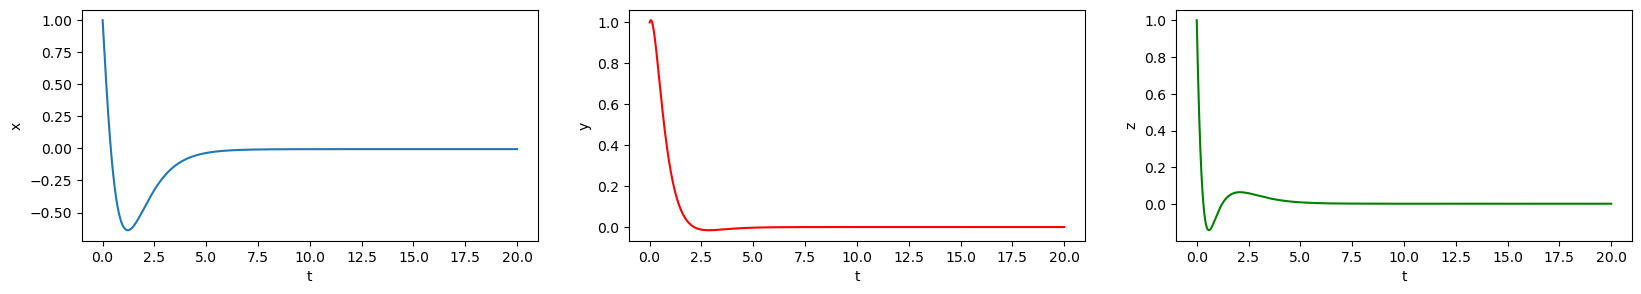

In [12]:
plt.figure(figsize=(20, 3))

plt.subplot(131)
plt.plot(t, xs)
plt.xlabel("t")
plt.ylabel("x");

plt.subplot(132)
plt.plot(t, ys, color = 'r')
plt.xlabel("t")
plt.ylabel("y");

plt.subplot(133)
plt.plot(t, zs, color = 'g')
plt.xlabel("t")
plt.ylabel("z")

# Henon system

In [13]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import control
import re, seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math as mth
np.random.seed(5)
N = 1000
X = np.random.uniform(-0.2, 0.2, (N, 2))
y1 = -X[:,0]*X[:,0]
y2 = np.zeros(N)
def rbf (x_i, x_j, gamma = 1.0):
    return np.exp( -gamma * (np.linalg.norm(x_i - x_j, 2)))
def make_SVR(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=100)
    feature_scaler = StandardScaler()
    X_train = feature_scaler.fit_transform(X_train)
    X_test = feature_scaler.transform(X_test)
    parameters = {"C": [1], "gamma": [0.001], "epsilon": [0.1]
                 }
    model = GridSearchCV(SVR(kernel='rbf'), parameters)
    model.fit(X_train, y_train)
    return  model

In [14]:
def f2_nl(x):
    return np.array([-x[0]*x[0], 0])

In [15]:
a = 1.4
b = 0.3
x_eq_1 = 0.5 * (b - 1 + mth.sqrt((b - 1) ** 2 + 4 * a))
print("x_+=",x_eq_1)
MHenon = np.array([[-2*x_eq_1,b],[1,0]])
B = np.array([[1],[1]])
P = np.array([-0.35, -0.7])
u_control_henon = control.acker(MHenon, B, P)
model1 = make_SVR(X, y1)
model2 = make_SVR(X, y2)
print('Feedback gain matrix k = {0}'.format(u_control_henon))

x_+= 0.8838962679253065
Feedback gain matrix k = [[-1.02589694  0.30810441]]


In [16]:
def approximated_henon(q, M, B, u_control):
    f2_nl_error = f2_nl(q) - np.array([model1.predict([q])[0], model2.predict([q])[0]])
    M_stab = M.dot(q) - B.dot(u_control).dot(q)
    xst = M_stab + f2_nl_error
    return np.array(xst)

In [17]:
t = np.linspace(0, 10, int(500), endpoint=True)
ns = len(t)
xs = np.empty(ns)
ys = np.empty(ns)
xs[0], ys[0] = (-1.5, 3)
for i in tqdm(range(ns - 1)):
    current_point = np.array([xs[i], ys[i]])
    xt, yt = approximated_henon(current_point, MHenon, B, u_control_henon)
    xs[i + 1] = xt
    ys[i + 1] = yt
print(xs[ns-1],ys[ns-1])

100%|███████████████████████████████████████| 499/499 [00:00<00:00, 5403.18it/s]

0.011320487725392476 0.017532347830490586


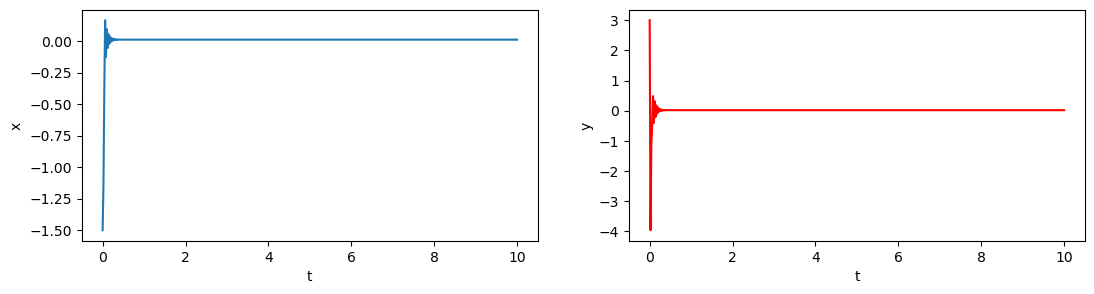

In [18]:
plt.figure(figsize=(20, 3))

plt.subplot(131)
plt.plot(t, xs)
plt.xlabel("t")
plt.ylabel("x");

plt.subplot(132)
plt.plot(t, ys, color = 'r')
plt.xlabel("t")
plt.ylabel("y");